# Test DMI Calculation

In [1]:
import sys
sys.path.append('../')
import helpers.fileHandler as fh
import helpers.cvdpTime as cvdpTime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import cftime

First load up the cvdp and figure out the details of the index we want to calculate

In [2]:
cvdp = fh.loadModelData('CESM-LME', 'cvdp_data', '005', decode_times=False)

ninoCvdp = cvdp.nino34
del cvdp
ninoCvdp = cvdpTime.decodeTime(ninoCvdp)
ninoCvdp.comment_cvdp

Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.005.cvdp_data.850-2005.nc']


'area average domain (-5:5N, 190:240E)'

Next load the model outputs, but drop all the variables we don't care about

In [3]:
ds = fh.loadModelData('CESM-LME', 'SST', '005',drop_variables=('ANGLE','ANGLET', 'DXT', 'DXU', 'DYT', 'DYU', 'HT', 'HTE', 'HTN',
              'HU', 'HUS', 'HUW', 'KMT', 'KMU', 'REGION_MASK', 'T0_Kelvin',
              'UAREA', 'cp_air', 'cp_sw', 'days_in_norm_year', 'dz', 'dzw', 'fwflux_factor', 
              'grav', 'heat_to_PW', 'hflux_factor', 'latent_heat_fusion', 'latent_heat_vapor',
              'mass_to_Sv', 'moc_components', 'momentum_factor','nsurface_t', 'nsurface_u', 
              'ocn_ref_salinity', 'omega', 'ppt_to_salt', 'radius', 'rho_air', 'rho_fw', 'rho_sw',
              'salinity_factor', 'salt_to_Svppt', 'salt_to_mmday', 'salt_to_ppt', 'sea_ice_salinity',
              'sflux_factor', 'sound', 'stefan_boltzmann', 'transport_components', 'transport_regions',
              'vonkar','z_t_150m', 'z_w', 'z_w_bot', 'z_w_top', 'moc_z', 'lat_aux_grid', 'time_bound','z_t', 'ULAT', 'ULONG') )

Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.085001-089912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.090001-099912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.100001-109912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.110001-119912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.120001-129912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.130001-139912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.140001-149912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.150001-159912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.160001-169912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.170001-179912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.180001-184

In [4]:
#There's only one depth dimension, so we will drop that

ds['SST']=ds.SST.isel(z_t=0)

#For some reason TAREA has a time demension, but doesn't change in time, so well drop that too
ds['TAREA']=ds.TAREA.isel(time=0)

#Making TAREA a coordinate
ds=ds.set_coords('TAREA')

Carve out the area of interest for Nino 34

In [5]:
nino34=ds.where((ds.TLAT>=-5) & (ds.TLAT<=5) & (ds.TLONG>=190) & (ds.TLONG<=240), drop=True)
del(ds)

C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


Sanity check that the areas selected look believable

C:\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


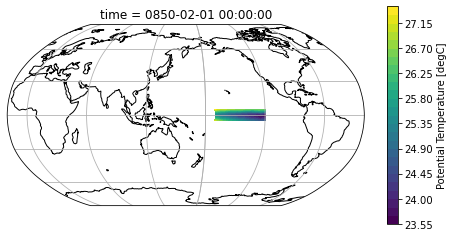

In [6]:
nino34Slice = nino34.isel(time=0) # select a slice

# -- plot the 'quick' way
plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=160))  # set up projection
ax.set_global()

#sst2d.SST.plot.pcolormesh()

nino34Slice.SST.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='TLONG', y='TLAT', center=False, levels=35)


ax.coastlines()
ax.gridlines()
plt.show()

Calculate nino34

In [7]:
# First calculate SST Anomalies based on
# climatology = "850-2005 climatology removed prior to all calculations (other than means)";

easternSst=nino34.SST.groupby('time.month')

nino34['sstAnom']=easternSst-easternSst.mean(dim='time')

nino34.chunk(chunks={'time':13872})

#easternSstAv=(nino34.sstAnom*nino34.TAREA).sum(dim=('nlat','nlon'))/nino34.TAREA.sum()
easternSstAv=nino34.sstAnom.weighted(nino34.TAREA).mean(dim=('nlon','nlat'))

#Load that into memory to speed up accessing it multiple times
easternSstAv.load()

C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]


<xarray.DataArray (time: 13872)>
array([-0.26150261, -0.02548302,  0.1622865 , ..., -0.61297338,
       -0.68380224, -0.47953208])
Coordinates:
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
    month    (time) int64 2 3 4 5 6 7 8 9 10 11 12 ... 3 4 5 6 7 8 9 10 11 12 1

(calculatedDmi-iodCvdp).plot()

Do a comparison plot. Between calculated index and cvdp

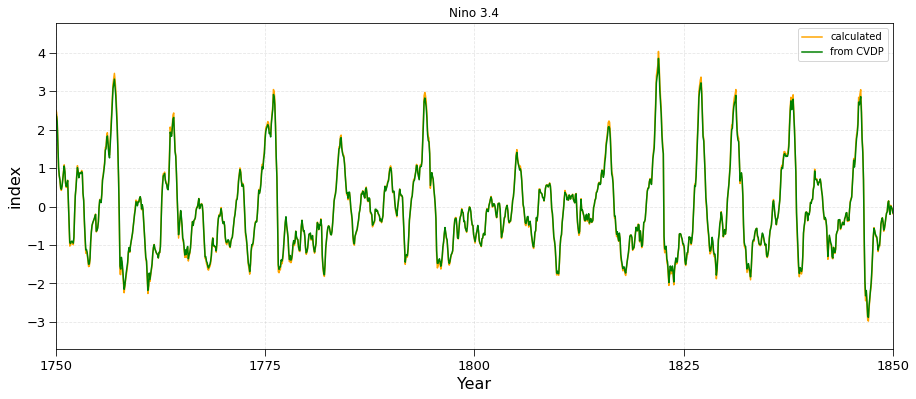

In [8]:
# Plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

#domainAv.plot(color='red',label='based on cosine Lat')
easternSstAv.plot(color='orange',label='calculated')
ninoCvdp.plot(color='green' ,label='from CVDP')

plt.xlim(cftime.DatetimeNoLeap(1750,1,1), cftime.DatetimeNoLeap(1850,1,1))

plt.title("Nino 3.4")
plt.ylabel("index", fontsize=16)  
plt.xlabel("Year", fontsize=16)

plt.tick_params(which = 'minor', labelsize=13, length=4)
plt.tick_params(which = 'major', labelsize=13, length=7)
ax.grid(which='major', alpha=0.3, linestyle='dashed')

plt.legend()

plt.show()

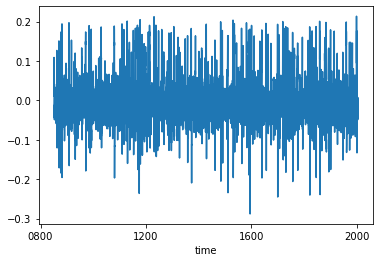

In [9]:
easternSstAv=easternSstAv.sortby('time')
(easternSstAv-ninoCvdp).plot()

In [10]:
(ninoCvdp-easternSstAv).std().values

array(0.05407238)